# Continuous Control

---

You are welcome to use this coding environment to train your agent for the project.  Follow the instructions below to get started!

### 1. Start the Environment

Run the next code cell to install a few packages.  This line will take a few minutes to run!

In [1]:
!pip -q install ./python

tensorflow 1.7.1 has requirement numpy>=1.13.3, but you'll have numpy 1.12.1 which is incompatible.
ipython 6.5.0 has requirement prompt-toolkit<2.0.0,>=1.0.15, but you'll have prompt-toolkit 3.0.5 which is incompatible.


In [2]:
import torch
import numpy as np
from collections import deque
from unityagents import UnityEnvironment

import matplotlib.pyplot as plt
%matplotlib inline

# Watch for changes in any of the imported files
%load_ext autoreload
%autoreload 2

The environments corresponding to both versions of the environment are already saved in the Workspace and can be accessed at the file paths provided below.  

Please select one of the two options below for loading the environment.

In [3]:
from unityagents import UnityEnvironment
import numpy as np

# select this option to load version 1 (with a single agent) of the environment
#env = UnityEnvironment(file_name='/data/Reacher_One_Linux_NoVis/Reacher_One_Linux_NoVis.x86_64')

# select this option to load version 2 (with 20 agents) of the environment
env = UnityEnvironment(file_name='/data/Reacher_Linux_NoVis/Reacher.x86_64')

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_speed -> 1.0
		goal_size -> 5.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [4]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

Run the code cell below to print some information about the environment.

In [5]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 20
Size of each action: 4
There are 20 agents. Each observes a state with length: 33
The state for the first agent looks like: [  0.00000000e+00  -4.00000000e+00   0.00000000e+00   1.00000000e+00
  -0.00000000e+00  -0.00000000e+00  -4.37113883e-08   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00  -1.00000000e+01   0.00000000e+00
   1.00000000e+00  -0.00000000e+00  -0.00000000e+00  -4.37113883e-08
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   5.75471878e+00  -1.00000000e+00
   5.55726624e+00   0.00000000e+00   1.00000000e+00   0.00000000e+00
  -1.68164849e-01]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Note that **in this coding environment, you will not be able to watch the agents while they are training**, and you should set `train_mode=True` to restart the environment.

In [6]:
env_info = env.reset(train_mode=True)[brain_name]      # reset the environment    
states = env_info.vector_observations                  # get the current state (for each agent)
scores = np.zeros(num_agents)                          # initialize the score (for each agent)
while True:
    actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
    actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
    env_info = env.step(actions)[brain_name]           # send all actions to tne environment
    next_states = env_info.vector_observations         # get next state (for each agent)
    rewards = env_info.rewards                         # get reward (for each agent)
    dones = env_info.local_done                        # see if episode finished
    scores += env_info.rewards                         # update the score (for each agent)
    states = next_states                               # roll over states to next time step
    if np.any(dones):                                  # exit loop if episode finished
        break
print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))

Total score (averaged over agents) this episode: 0.14699999671429395


When finished, you can close the environment.

In [7]:
#env.close()

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  A few **important notes**:
- When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```
- To structure your work, you're welcome to work directly in this Jupyter notebook, or you might like to start over with a new file!  You can see the list of files in the workspace by clicking on **_Jupyter_** in the top left corner of the notebook.
- In this coding environment, you will not be able to watch the agents while they are training.  However, **_after training the agents_**, you can download the saved model weights to watch the agents on your own machine! 

In [8]:
def plot_scores(scores):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    plt.plot(np.arange(len(scores)), scores)
    plt.ylabel('Score')
    plt.xlabel('Episode #')
    plt.show()

In [9]:

# Note: `brain_name` should be defined globally
def env_step(env, actions):
    # Execute the action for each agent in the environment
    env_info = env.step(actions)[brain_name]
    # Get the next state for each agent
    next_states = env_info.vector_observations
    # Get the reward for each agent
    rewards = env_info.rewards
    # Get whether or not the episode has terminated
    dones = env_info.local_done
    return next_states, rewards, dones

In [10]:
def train_ddpg(agent, n_episodes=1000, max_t=1000, save_file=None):
    """Deep Deterministic Policy Gradients.
    
    Params
    ======
        agent (Agent): an instance of a DDPG agent(s)
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of time steps per episode
        save_file (string): prefix for the actor and critic model filenames
    """
    
    # All the scores from each episode
    scores_all = []
    # The last 100 scores
    scores_window = deque(maxlen=100)
    
    # Loop over each episode
    for i_episode in range(1, n_episodes+1):
        # Reset the environment
        env_info = env.reset(train_mode=True)[brain_name]
        # Get the current state for each agent
        states = env_info.vector_observations
        # Reset the noise
        agent.reset()
        # Initialize the score for each agent
        scores = np.zeros(num_agents)
        
        # Loop over each time step
        for t in range(max_t):            
            # Select an action for each agent according to the current policy
            actions = agent.act(states)
            # Execute the actions in the environment,
            #     then observe the next state and reward for each agent
            next_states, rewards, dones = env_step(env, actions)
            # Learn from experience and update network parameters for each agent
            agent.step(states, actions, rewards, next_states, dones)
            
            # Update the score for each agent
            scores += rewards
            # Roll over each state to the next time step
            states = next_states
            # Record the current mean score across all agents, (overwriting the output)
            print(f'\rEpisode {i_episode}\tTimestep {t}'
                  f'\tCurrent Score: {np.mean(scores):.2f}', end="")
            # Exit the loop if the episode has terminated
            if np.any(dones):
                break
        
        # Take the average score across all agents
        score = np.mean(scores)
        # Save the most recent score
        scores_all.append(score)
        scores_window.append(score)
        # Record the mean score over the last 100 scores
        mean_score = np.mean(scores_window)
                
        # Per episode, record the mean score over the last 100 (or less) episodes
        print(f'\rEpisode {i_episode}'
              f'\tAverage score over the last 100 episodes: {mean_score:.2f}')
            
        # Goal: Reach 30+ over 100 consecutive episodes
        if mean_score >= 30.0:
            print(f'\nEnvironment solved in {i_episode:d} episodes!'
                  f'\tAverage score over the last 100 episodes: {mean_score:.2f}')
            if save_file:
                torch.save(agent.actor_local.state_dict(), f'{save_file}_actor.pth')
                torch.save(agent.critic_local.state_dict(), f'{save_file}_critic.pth')
            break
            
    return scores_all

In [11]:
from ddpg_agent import Agent

Episode 1	Average score over the last 100 episodes: 0.36
Episode 2	Average score over the last 100 episodes: 0.24
Episode 3	Average score over the last 100 episodes: 0.17
Episode 4	Average score over the last 100 episodes: 0.13
Episode 5	Average score over the last 100 episodes: 0.11
Episode 6	Average score over the last 100 episodes: 0.23
Episode 7	Average score over the last 100 episodes: 0.33
Episode 8	Average score over the last 100 episodes: 0.39
Episode 9	Average score over the last 100 episodes: 0.46
Episode 10	Average score over the last 100 episodes: 0.54
Episode 11	Average score over the last 100 episodes: 0.58
Episode 12	Average score over the last 100 episodes: 0.61
Episode 13	Average score over the last 100 episodes: 0.63
Episode 14	Average score over the last 100 episodes: 0.64
Episode 15	Average score over the last 100 episodes: 0.66
Episode 16	Average score over the last 100 episodes: 0.69
Episode 17	Average score over the last 100 episodes: 0.72
Episode 18	Average scor

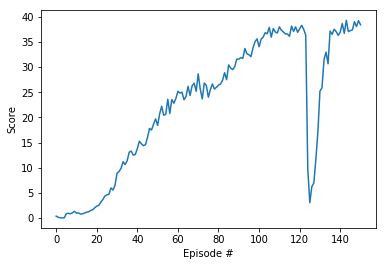

In [12]:
agent = Agent(num_agents=num_agents,state_size=state_size, action_size=action_size,random_seed=10)
scores = train_ddpg(agent,save_file='checkpoint')
plot_scores(scores)
#agent = Agent(state_size=env.observation_space.shape[0], action_size=env.action_space.shape[0], random_seed=10)